

# Project: Tmdb Movies Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction
Movies are mostly for fun and sometime provide inspiration. While the production companies aim for higher revenues and higher ratings, they need to investigate a similar data to this data before making a new movie. Using This dataset which contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue tmdb-movies dataset I will try to answer the following questions:

Q1 How did the number of produced movies change over time ?

Q2 Which year has the most/least number of movies ?

Q3 What kinds of properties are associated with movies that have high revenues (high revenue > 50 M)?

Q3.1 what is the number of movies with high revenue movies ?

Q3.2 what is the mean runtime of high revenue movies ?

Q3.3 what is the mean & median vote_avarege of high revenue movies ?

Q3.4 what is the median of budget for high revenue movies ?

Q3.5 Does high budget movies receive better revenue ?

Q3.6 Does high budget movies have longer runtime ?

In [126]:
# importing important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## 2.Data Wrangling


### General Properties

In [127]:
# Loading the data and having a look at the first few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [128]:
# getting infromation from the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [129]:
# getting genreal idea about the data.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## 3. Data Cleaning & Assessing

### 3.1 Information from the first read of data deceptions and info.
we have 10866 entries on 21 coulumns.


*(3.2)Some data is not really important in this analysis so they shuold be just droped .
For example : (imdb_id,overview,hompage ...)

*(3.3)Deleting duplicated rows.

*(3.4)Important numerical columns showing a lot of zeros as showing by {df.describe()} this affect visualization.So they should be changed to NaN and droped.

*(3.5)checking by unqiness.

*(3.6)changing types of ( budget , revenue ).



### 3.2 Dropping unimportant columns.
Before searching throw the data we can easily drop unwanted coulums (imdb_id,homepage,overview,tagline,release_date) to get since I will not use them in this investigation

In [130]:
# dropping unwanted coulumns.
df.drop(['imdb_id','homepage','overview','tagline','release_date'] , axis = 1, inplace = True)

In [131]:
# checking after the drop.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

### 3.2.1 Important notice . (number of coulmns).
clearly the number of coulmns has been reduced to 16 while the original has 21

### 3.3 deleting duplicated rows.

In [132]:
#checking for duplicated rows
sum(df.duplicated())

1

In [133]:
#droping duplicated rows
df = df.drop_duplicates()

In [134]:
#checking for duplicated rows again
sum(df.duplicated())


0

### 3.4 removing all zeros from imoprtant numrical data .
It is not logical to have a zero runtime movie or 0 budget or 0 revenue . so I will change all zero entries in these coulumns to Nan and drop them.

In [135]:
# changing zeros to nan .
df['runtime'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
# droping all Nan values 
df.dropna(axis=0, inplace=True)


In [136]:
# checking how many rows we have lift .
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3677 non-null   int64  
 1   popularity            3677 non-null   float64
 2   budget                3677 non-null   float64
 3   revenue               3677 non-null   float64
 4   original_title        3677 non-null   object 
 5   cast                  3677 non-null   object 
 6   director              3677 non-null   object 
 7   keywords              3677 non-null   object 
 8   runtime               3677 non-null   float64
 9   genres                3677 non-null   object 
 10  production_companies  3677 non-null   object 
 11  vote_count            3677 non-null   int64  
 12  vote_average          3677 non-null   float64
 13  release_year          3677 non-null   int64  
 14  budget_adj            3677 non-null   float64
 15  revenue_adj         

### 3.4.1 Important notice . (number of entries).
As showing above now we only have 3677 real  entries while the orgoinal was 10865 so this data should be updated by real values of runtime , budget & revrnue to get the bigger picture.

### 3.5 checking uniqueness.

In [137]:
df.nunique()

id                      3677
popularity              3675
budget                   389
revenue                 3591
original_title          3632
cast                    3657
director                1630
keywords                3625
runtime                  134
genres                  1021
production_companies    2903
vote_count              1270
vote_average              53
release_year              56
budget_adj              2037
revenue_adj             3673
dtype: int64

### 3.5.1 notes from uniqueness :
* Id is correctly unique.
* althougth some original titles are not same it is acceptable in case of movies. 


### 3.6 changing types.
Here I will correct the type of revenue & budget from float to integer.

In [138]:
# correct the type of revenue.
df['revenue']=df['revenue'].astype(np.int64)
# correct the type of budget.
df['budget']=df['budget'].astype(np.int64)
# checking if correction happen.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3677 non-null   int64  
 1   popularity            3677 non-null   float64
 2   budget                3677 non-null   int64  
 3   revenue               3677 non-null   int64  
 4   original_title        3677 non-null   object 
 5   cast                  3677 non-null   object 
 6   director              3677 non-null   object 
 7   keywords              3677 non-null   object 
 8   runtime               3677 non-null   float64
 9   genres                3677 non-null   object 
 10  production_companies  3677 non-null   object 
 11  vote_count            3677 non-null   int64  
 12  vote_average          3677 non-null   float64
 13  release_year          3677 non-null   int64  
 14  budget_adj            3677 non-null   float64
 15  revenue_adj         

<a id='eda'></a>
## 4 Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 4.1 Q1 how did the number of produced movies change over time ?
Here I will search if the number of movies have increased, decreased or stayed the same over the years.

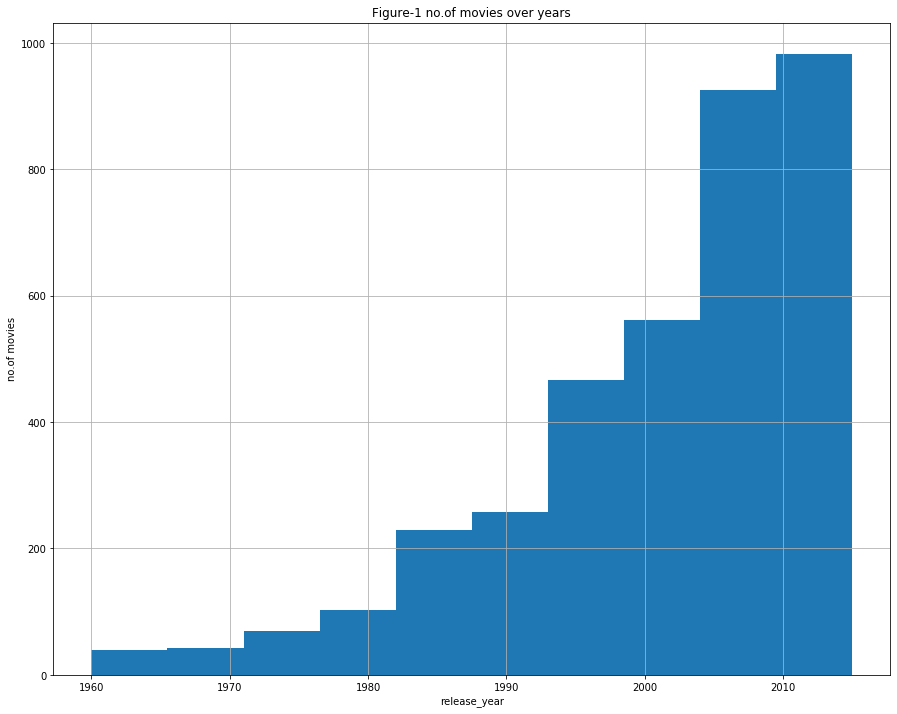

In [139]:
# to plot histogram between number of movies and year 
# x-axis label
plt.xlabel('release_year')
# y-axis label

plt.ylabel('no.of movies')
#title of the line plot

plt.title('Figure-1 no.of movies over years')
#plotting the graph

df.release_year.hist(figsize= (15 , 12));

### 4.1.1 Discussion of Q1
Figure-1 show that it is clear that movies are produced more and more over the years.Also to get the exact number of movies yearly we can use groupby function.

### 4.2 Q2 Which year has the most/least number of movies ?

Here I will search for the exact number of movies - out of 3677- for each year between 1960 & 2015

In [140]:
# to get the exact number of movies-out of 3677- each year between 1960 to 2015
no_of_movies_grouped_by_year = df.groupby('release_year').id.count()
no_of_movies_grouped_by_year.head(65)

release_year
1960      4
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     16
1979     16
1980     23
1981     29
1982     26
1983     31
1984     41
1985     39
1986     47
1987     45
1988     55
1989     50
1990     52
1991     49
1992     52
1993     70
1994     61
1995     78
1996     82
1997     86
1998     89
1999    111
2000    100
2001    114
2002    120
2003    116
2004    139
2005    157
2006    163
2007    148
2008    153
2009    166
2010    167
2011    192
2012    146
2013    164
2014    159
2015    155
Name: id, dtype: int64

### 4.2.1 ploting the result into a bar chart.

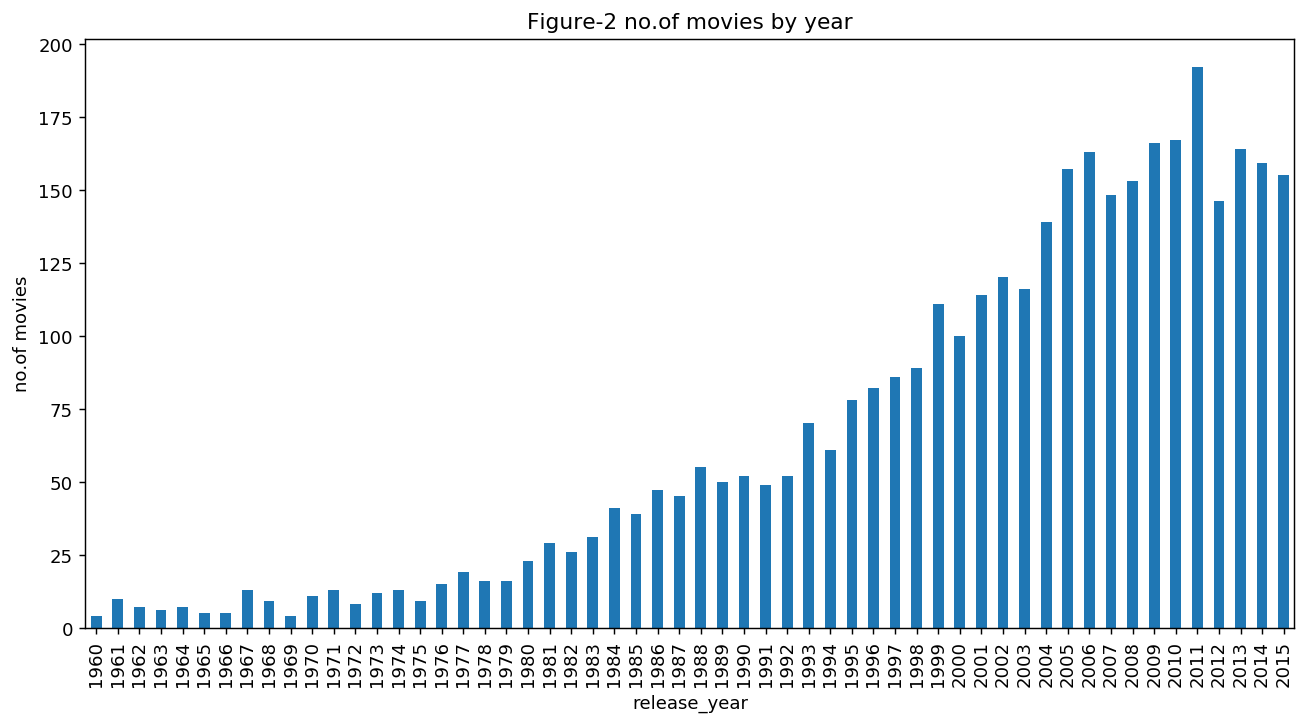

In [141]:
# to plot bar-chart by number of movies by every year 

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

# x-axis label
plt.xlabel('release_year')
# y-axis label
plt.ylabel('no.of movies')
#title of the line plot
plt.title('Figure-2 no.of movies by year')

#plotting the graph
no_of_movies_grouped_by_year.plot(kind = 'bar');

### 4.2.2 Discussion of Q2

#### the year with most no. movies is 2011 with 192 movie .
#### the years with least no. movies are both 1960 & 1969 with 4 movies 

#### important note 
if we didn't remove all the rows with zero ( runtime , revenue, budjet ) this will differ greatly.We will be using bar plot for this analysis.Since we want to know the number of movies for every year therefore we have to count up all the movies of a particular year

### 4.3	Q3 What kinds of properties are associated with movies that have high revenues?


Here I will search for the answer of the following relations with relation to high revenue movies ( revenue > 50 M ).

In [142]:
# select movies with revenue  greater than 50M.

high_revenues_movies = df[df['revenue']>50000000]



#### 4.3.1 Q3.1 what is the number of movies with high revenue movies ?

In [143]:
high_revenues_movies.id.count()

1803

#### 4.3.2 Q3.2 what is the mean runtime of high revenue movies ?

In [144]:
high_revenues_movies.runtime.mean()

113.10094287298946

#### 4.3.3 Q3.3 what is the mean & median vote_average of high revenue movies ?

In [145]:
high_revenues_movies.vote_average.mean()

6.308763172490289

In [146]:
high_revenues_movies.vote_average.median()

6.3

#### 4.3.4 Q3.4 what is the median of budget for high revenue movies ?

In [147]:
high_revenues_movies.budget.median()

45000000.0

#### 4.3.5 Q3.5 Does high budget movies receive better revenue ?

In [148]:
# select movie with budget less than the median

low_budget = high_revenues_movies.query('budget < 45000000')

# select movie with budget greater than or equal to the median

high_budget = high_revenues_movies.query('budget >= 45000000')

# ensure these queries included each movie exactly once
num_samples = high_revenues_movies.shape[0]
num_samples == low_budget['budget'].count() + high_budget['budget'].count() # should be True

True

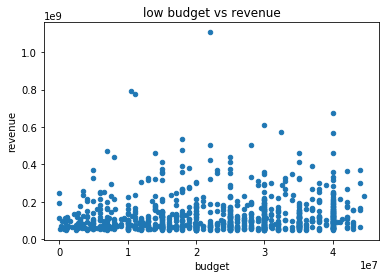

In [149]:
# to plot scatter-chart between low budget & revenue of high revenue movies


low_budget.plot(x="budget", y="revenue",title = 'low budget vs revenue' ,  kind="scatter");

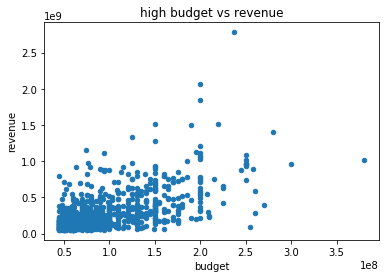

In [150]:
# to plot scatter-chart between high budget & revenue of high revenue movies

high_budget.plot(x="budget", y="revenue",title = 'high budget vs revenue', kind="scatter");

In [151]:
# to get the mean of revenue due to high & low budget movies related to high revenue 
low_budget.revenue.mean(), high_budget.revenue.mean()

(130133096.88500564, 283986516.19541484)

In [152]:
# to get the minimum of revenue due to high & low budget movies related to high revenue 

low_budget.revenue.min(), high_budget.revenue.min()

(50007546, 50068310)

In [153]:
# to get the maximam of revenue due high & low budget movies related to high revenue 

low_budget.revenue.max(), high_budget.revenue.max()

(1106279658, 2781505847)

#### 4.3.5 Discussion of Q3.5
we can conclude that yes high budget movies receive higher revenue with a mean of 283M while the low buget ones have only a mean of 130M

### 4.3.6 Q3.6 Does high budget movies have longer runtime ?

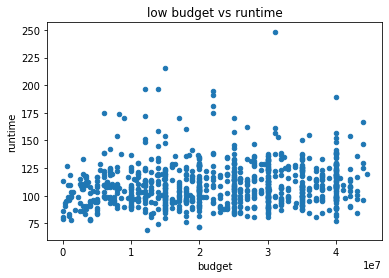

In [154]:
# to plot scatter-chart between low budget & runtime of high revenue movies

low_budget.plot(x="budget", y="runtime",title = 'low budget vs runtime', kind="scatter");



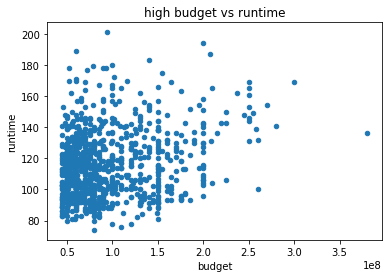

In [155]:
# to plot scatter-chart between high budget & runtime of high revenue movies

high_budget.plot(x="budget", y="runtime",title = 'high budget vs runtime', kind="scatter");

In [156]:
# to get the mean of runtime due to high & low budget movies related to high revenue 
low_budget.runtime.mean(), high_budget.runtime.mean()

(109.92108229988726, 116.18013100436681)

In [157]:
# to get the minimam of runtime due to high & low budget movies related to high revenue 

low_budget.runtime.min(), high_budget.runtime.min()

(69.0, 74.0)

In [158]:
# to get the maximam of runtime due to high & low budget movies related to high revenue 

low_budget.runtime.max(), high_budget.runtime.max()

(248.0, 201.0)

####  4.3.6 Discussion of Q3.6


we can conclude that yes also high budget movies have longer runtime with a mean of 116.18 minutes while the low budget ones have only a mean of 109 minutes.

<a id='conclusions'></a>
## Conclusions
This was a very excitting data analysis. I came out with some entertaining facts about movies. 
to conclude this analysis we can state the following:

* movies production has increased over time which is logical due to the advantage of rising technology.

* For a Movie to be in high revenue range .
It should be within average of  113 minutes runtime and his budget more than 45 million while aiming for a vote average more than 6.3 .  


### Limitations:
* lost data with alot of zeros in runtime , budget & revenue.
* considering movies which had a high revenue of greater than 50 Million. 
* data is clearly not up to date since it is showing only up to 2015 ( analysis was done 2020 ).So there should be some updates.
* no currency was provided .

